# Different Perspectives on the The Maximum Sum Subarray Problem

\| [Eitan Turok]()  
2023-08-20

# Introduction

Today, we are going to solve the famous [maximum subarray
problem](https://leetcode.com/problems/maximum-subarray/). The problem
is stated as:

> Given an integer array `nums`, find the contiguous subarray
> (containing at least one number) which has the largest sum.

This problem is usually solved with Kadane’s algorithm, the for a
specific dynamic programming algorithm. However, we can actually solve
this problem using a host of different algorithmic techniques:

1.  Brute Force
2.  Divide and Conquer
3.  Dynamic Programming
4.  Kadane’s algorithm
5.  Sliding Window

Most people ignore the most interesting part of the problem: that we can
solve it in so many different ways! We just have to change our
perspective and all of a sudden we can use a different algorithmic
technique.

<img src="perspective.jpeg" style="width:100%">

Two different perspectives.
[Source.](https://www.lifehack.org/868287/perspective-on-life)

When reading this article, I want your thought process to be something
like:

> Cool, we can solve this problem with a divide and conquer approach!
> Wait, this problem really can be solved with a dynamic programming
> algorithm, interesting. Hold up, it can be solved with the sliding
> window technique! No way!

We will show how some of these techniques are actually equivalent and
are just doing the same thing while having different names. Pretty cool!

For each technique, I will explain the idea, give the time/space
complexity, and provide a python implementation.

# Brute Force

**Idea:** Generate all possible subarrays from the original array and
find the one that has the greatest sum.

**Time Complexity:** $O(n^2)$

The two nested for loops call line 6 of the algorithm $n (n+1)/2$ times,
meaning we have a runtime of $O(n^2)$.

**Space Complexity:** $O(1)$

We don’t store anything except for the maximum sum seen so far.

**The Algorithm:**

In [23]:
def max_subarray_brute_force(nums):
  """Compute the maximum subarray with a brute force technique."""

  max_sum = -float('inf')
  for i in range(len(nums)):
    for j in range(i, len(nums)):
      new_sum = sum(nums[i: j + 1])
      max_sum = max(max_sum, new_sum)
  return max_sum

**Testing:** Test that this algorithm computes the correct values with
the code below.

# Divide And Conquer

**Idea:** Let the contiguous array that results in the maximum sum be
dennoted by `nums[i, ..., j]`. Then if we are looking at the array
`nums[low, ..., high]`, we know that the maximum subarray
`nums[i, ..., j]` must be located in exactly one of three cases:

1.  entirely in the subarray `nums[low, ..., mid]` so that
    $low \leq i \leq j \leq mid$
2.  entirely in the subarray `nums[mid+1, ..., high]` so that
    $mid+1 \leq i \leq j \leq high$
3.  crossing the midpoint so that $low \leq i \leq mid < j \leq high$

where `mid = (l + r) // 2`.

We can find the maximum subarrays of `nums[low, ..., mid]` and
`nums[mid+1, ..., high]` recursively because these two problems are
smaller instances of the original problem of finding a maximum subarray.
However, the problem of finding a maximum subarray that crosses the
midpoint is *not* a smaller instance of our orignal problem because it
has the added constraint that the subarray it chooses *must* cross the
midpoint.

So the function `max_crossing_subarray()` will compute the maximum
subarray that crosses the midpoint. It works by computing the left sum,
the biggest possible sum we can get by starting at `mid` and repeatedly
adding the number to the left of `mid`. Similarly, we compute the right
sum, the biggest possible sum we can get by starting at `mid` and
repeatedly adding the number to the right of `mid`. Then we add the left
sum and right sum because together they are the greatest sums formed
that must go through `mid`. This function returns the indices
demarcating a maximum subarray that crosses the midpoint along with the
sum of the values in this maximum subarray.

Lastly, `max_subarray_helper()` is a helper function that does most of
the work organizing the three cases described above. It also returns the
indices demarcating a maximum subarray that crosses the midpoint along
with the sum of the values in this maximum subarray.

Formally, we can express this as a recurrence relation:

where

1.  $mid = i + (j - i) // 2$
2.  $dp[i][j]$ is the maximum sum found in the subarray in
    `nums[i, ..., j]` (inclusive of $i,j$).

To compute the maximum subarray sum, simply compute
$dp[0][len(nums)-1]$.

**Time Complexity:** $O(n log n)$

Let $T(n)$ be the runtime of `max_subarray_helper()` on an array of
length $n$. `max_subarray_helper()` has the recurrence relation The term
$2T(n/2)$ comes from the *two* recursive calls that are each made on
*half* the input, specifically on `nums[low, ..., mid]` and
`nums[mid+1, ..., high]`. The term $\Theta(n)$ comes from calling
`max_crossing_subarray()` which runs in linear time. Solving this
equation with the [master
method](https://en.wikipedia.org/wiki/Master_theorem_(analysis_of_algorithms)),
we find that

**Space Complexity:** $O(1)$

We only store constants like `low`, `high`, `left_low`, `left_high`,
`left_sum`, etc. Note: this space complexity does not take into account
the $O(log n)$ space used by the recursive stack.

**The Algorithm:**

In [10]:
def max_crossing_subarray(low, mid, high, nums):
  """Compute the maximum subarray that crosses the midpoint."""
    
  # get largest left sum that ends at m, ie get largest sum of the form nums[i:mid+1] for some i
  left_sum = -float('inf')
  sum_ = 0
  for i in range(mid, low - 1, -1):
    sum_ += nums[i]
    if sum_ > left_sum:
      left_sum = sum_
      max_left = i
          
  # get largest right sum that starts at m, ie get largest sum of the form nums[mid+1:j] for some j
  right_sum = -float('inf')
  sum_ = 0
  for j in range(mid+1, high+1):
    sum_ += nums[j]
    if sum_ > right_sum:
      right_sum = sum_
      max_right = j
  
  return (max_left, max_right, left_sum + right_sum)

In [8]:
def max_subarray_helper(low, high, nums):
  """Find the maximum subarray in nums[low, ..., high]."""

  if low == high: # base case
    return (low, high, nums[low])
  
  # compute the maximum subarray to left of mid, to the right of mid, and crossing mid
  mid = low + (high - low) // 2
  left_low, left_high, left_sum = max_subarray_helper(low, mid, nums)
  right_low, right_high, right_sum = max_subarray_helper(mid + 1, high, nums)
  cross_low, cross_high, cross_sum = max_crossing_subarray(low, mid, high, nums)
  
  if left_sum >= right_sum and left_sum >= cross_sum: # if left_sum is the biggest
    return left_low, left_high, left_sum
  if right_sum >= left_sum and right_sum >= cross_sum: # if right_sum is the biggest
    return right_low, right_high, right_sum
  return cross_low, cross_high, cross_sum

In [9]:
def max_subarray_div_and_conq(nums):  
  """Compute the maximum subarray with a divide and conquer technique."""
  
  low, high = 0, len(nums) - 1
  _, _, max_sum = max_subarray_helper(low, high, nums)
  return max_sum

# Dynamic Programming

**Idea:** If we already know the largest sum in `nums[0:i]`, then the
largest sum in `nums[0:i+1]` is `nums[0:i] + nums[i]` if `nums[0:i]` is
positive. If `nums[0:i]` is negative, adding it to `nums[i]` would just
make it smaller, so the largest sum in `nums[0:i+1]` is just `nums[i]`.
This idea naturally lends itself to dynamic programming. In particular,
this problem has the recurrence:

where $dp[i]$ is the maximum sum obtained from contigious subarrays in
the first $i$ elements of `nums`. This recurrence relation can be
written more succinctly as

We will implement a bottom-up solution to this dynamic programming
problem, meaning we compute the maximum sum in the first element of
`nums`, the first two elements of `nums`, the first three elements of
`nums`, etc. At each iteration, we compute the maximum sum seen so far.

To compute the maximum subarray sum, simply compute $dp[len(nums)-1]$.

**Time Complexity:** $O(n)$

It takes constant time to compute a single entry in the table $dp$. And
because there are $n$ entries in the table, it will take $O(n)$ time to
fill in the entire table.

**Space Complexity:** $O(n)$

The table has $n$ entries so this algorithim take $O(n)$ space.

**The Algorithm:**

In [ ]:
def max_subarray_dp(nums):
  """compute the maximum subarray with a dynamic programming technique"""

  dp = [0] * (len(nums))
  dp[0] = max_sum = nums[0]

  for i in range(1, len(nums)):
    dp[i] = nums[i] + max(dp[i-1], 0)
    max_sum = max(max_sum, dp[i])
  return max_sum

# Kadane’s Algorithm

**Idea:** Kadane’s algorithm is the exact same as the dynamic
programming solution but it uses $O(1)$ space instead of $O(n)$ space.
Recall the recurrence relation for this problem is A closer analysis
reveals that to compute $dp[i]$, we only need $dp[i-1]$. We don’t need
any of the other previous entries of $dp$. This means we do not to store
the entire $dp$ table (which takes $O(n)$ space) and instead can store
just $dp[i-1]$ as `current_sum`. This is Kadane’s algorithm.

Again, to compute the maximum subarray sum, simply compute
$dp[len(nums)-1]$.

**Time Complexity:** $O(n)$

We must compute $n$ different values of $dp$.

**Space Complexity:** $O(1)$

We only store only the previous sum to compute the current sum.

**The Algorithm:**

In [ ]:
def max_subarray_kadane(nums):
  """compute the maximum subarray with the Kadane's algorithm technique"""
  
  max_sum = current_sum = nums[0]
  for i in range(1, len(nums)):
    current_sum = nums[i] + max(current_sum, 0)
    max_sum = max(max_sum, current_sum)
  return max_sum

# Sliding Window

**Idea:** Use two pointers `low` and `high` to maintain a sliding window
across the array. At every iteration, move `high` one to right and add
the new element to the running sum `sum_`. If the sum is less than the
new element `nums[high]`, then we would get a higher sum just by
starting our sum from `nums[high]`. So we want to keep on moving the
left pointer until `sum_ < nums[high]` is no longer true; this is
expressed with a while loop. (A closer look reveals that if we ever have
`sum_ < nums[high]` and wish to start our sum from `nums[high]`, we can
immediately move the left pointer to `nums[high]` if
`sum_ < nums[high]`, no need for a while loop; this optimized version is
commented out. Also, at every iteration we record the maximum sum so
once we’re done iterating through the array, we can just return the
maximum sum.

**Time Complexity:** $O(n)$

We iterate through the entire array once by moving two pointers.

**Space Complexity:** $O(1)$

Trivial.

**The Algorithm:**

In [ ]:
def max_subarray_sliding_window(nums):
  """compute the maximum subarray with a sliding window technique"""

  low, sum_ = 0, 0
  max_sum = -float('inf')
  
  for high in range(len(nums)):
    sum_ += nums[high]
    
    while sum_ < nums[high]:
      sum_ -= nums[low]
      low += 1

    # optimized version
    # if sum_ < nums[high]:
    #   sum_ = nums[high]
    #   low = high
  
    max_sum = max(max_sum, sum_)
  return max_sum

# Comparison

**Time & Space Complexity:** We can easily analyse the space and runtime
complexity of each algorithm.

| Technique           | Runtime     | Space  |
|---------------------|-------------|--------|
| Brute Force         | $O(n^2)$    | $O(1)$ |
| Divide & Conquer    | $O(n logn)$ | $O(1)$ |
| Sliding Window      | $O(n)$      | $O(1)$ |
| Dynamic Programming | $O(n)$      | $O(n)$ |
| Kadane’s Algorithm  | $O(n)$      | $O(1)$ |

**Sliding Window & Kadane’s Algorithm:** If you take a closer look, you
can see that Sliding Window and Kadane’s Algorithm are essentially the
same exact algorithm but implemented differently.

**Recurrence Relations:** Note that DP/Kadane’s algorithm can be
expressed by the recurrence relation

but the divide and conquer technique can be expressed by the recurrence
relation

Both recurrences display optimal substructure, meaning the solution to
the original problem can be achieved by finding the optimal solution to
smaller subproblems. Yet there are differences. The first recurrence is
1D while the second recurrence is 2D. This explains why the first
recurrence results in an $O(n)$ algorithm and the second recurrence
results in an $O(n log n )$ algorithm.

# Timing Maximum Subarray Algorithms

The table above states the worst case runtime of various maximum
subarray algorithms. However, how many seconds does it actually take to
compute the maximum subarray sum for each algorithm? How much faster is
one algorithm than another?

Below I run the five different maximum subarray algorithms and time
their runtime on inputs of different sizes. Every element of the input
array is randomly (uniformly) choosen from the interval $[-100, 100]$.

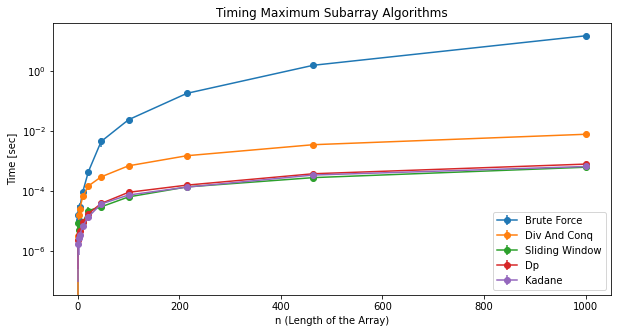

Note that, as expected, the $O(n^2)$ brute force algorithm is the
slowest, the $O(n log n)$ divide and conquer algorithm is the second
slowest, and the $O(n)$ sliding window algorithm, (non-constant space)
dynamic programming algorithm, and Kadane’s algorithm are the fastest.
This emperically confirms what we showed via theory.

# Works Cited

1.  Cormen, Thomas H, et al. Introduction to Algorithms. 3rd ed.,
    Cambridge (Massachusetts) ; London, MIT Press, 2007, pp. 68–74.
2.  Fabré, Maarten. “Plot Timings for a Range of Inputs.” Code Review
    Stack Exchange, 9 June 2017,
    codereview.stackexchange.com/a/165362/260966. Accessed 25 July 2022.
3.  Leetcode. “Maximum Subarray.” Leetcode.com,
    leetcode.com/problems/maximum-subarray/discuss/. Accessed 25 July
    2022.